In [ ]:
from google.colab import drive

# Mount Google Drive to access the datasets
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df_clean = pd.read_csv("/content/drive/MyDrive/n_datasets/df_clean.csv")

feature_cols = [
    "Maan B4.Weather Station 1 - Irradiance Horizontal",
    "Maan B4.Weather Station 1 - Temperature Ambient",
    "Maan B4.Weather Station 1 - Temperature PV Module",
    "Maan B4.Weather Station 1 - Humidity",
    "Maan B4.Weather Station 1 - Wind Speed",
    "Maan B4.Weather Station 1 - Wind Bearing",
    "hour_sin",
    "hour_cos",
    "day_sin",
    "day_cos",
    "month"
]


In [ ]:
X = df_clean[feature_cols]
y = df_clean["Power_Total"]



split_index = int(len(df_clean) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]



     Baseline Model (Persistence)     
RMSE : 390,829.831
MAE  : 169,002.015
R²   : 0.9838



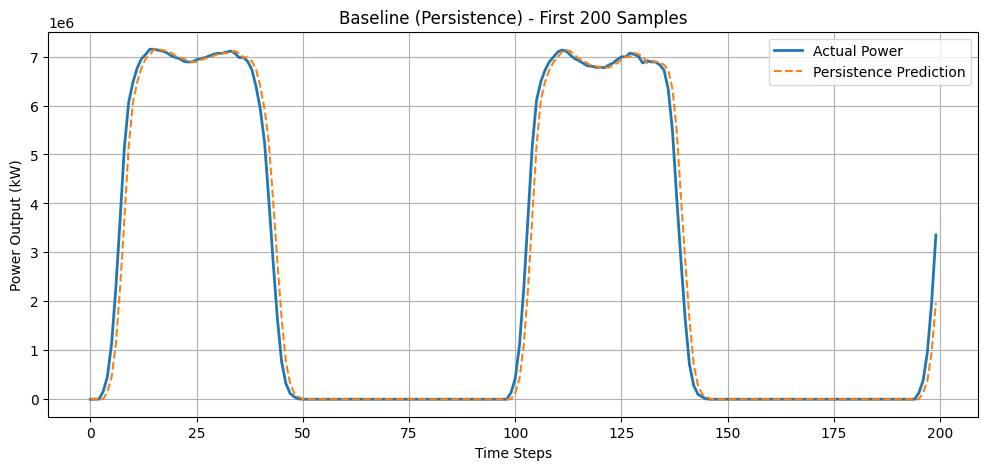

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


y_pred = y_test.shift(1)

y_test_eval = y_test.iloc[1:]
y_pred_eval = y_pred.iloc[1:]



rmse = np.sqrt(mean_squared_error(y_test_eval, y_pred_eval))
mae = mean_absolute_error(y_test_eval, y_pred_eval)
r2 = r2_score(y_test_eval, y_pred_eval)


print("======================================")
print("     Baseline Model (Persistence)     ")
print("======================================")
print(f"RMSE : {rmse:,.3f}")
print(f"MAE  : {mae:,.3f}")
print(f"R²   : {r2:.4f}")
print("======================================\n")


plt.figure(figsize=(12, 5))
plt.plot(y_test_eval.values[:200], label='Actual Power', linewidth=2)
plt.plot(y_pred_eval.values[:200], label='Persistence Prediction', linestyle='--')
plt.title("Baseline (Persistence) - First 200 Samples")
plt.xlabel("Time Steps")
plt.ylabel("Power Output (kW)")
plt.legend()
plt.grid(True)
plt.show()


        KNN Regression Results         
RMSE : 734,152.674
MAE  : 376,286.353
R²   : 0.9429



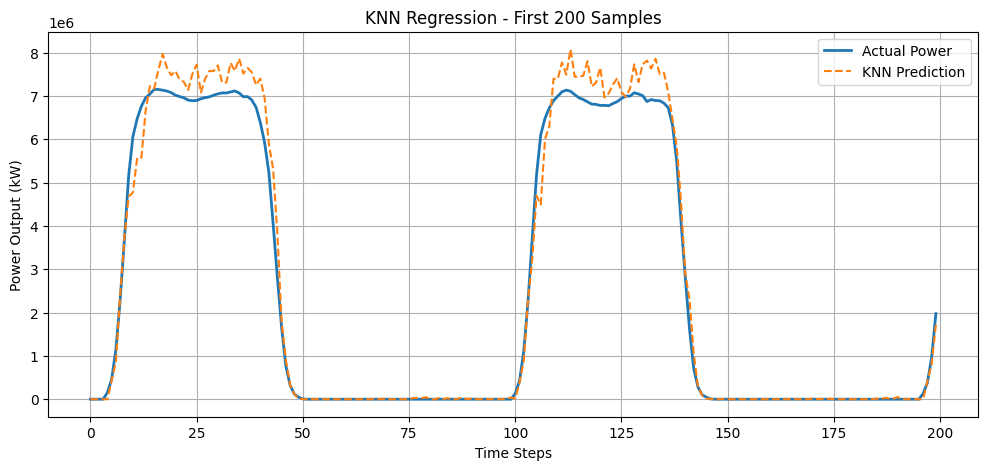


Model added to comparison table.


{'KNN': {'RMSE': np.float64(734152.6741844163),
  'MAE': 376286.35254869924,
  'R2': 0.9429466319803689}}

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np



knn_model = KNeighborsRegressor(
    n_neighbors=5,
    weights='distance',
    metric='euclidean'
)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)



rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn  = mean_absolute_error(y_test, y_pred_knn)
r2_knn   = r2_score(y_test, y_pred_knn)


print("======================================")
print("        KNN Regression Results         ")
print("======================================")
print(f"RMSE : {rmse_knn:,.3f}")
print(f"MAE  : {mae_knn:,.3f}")
print(f"R²   : {r2_knn:.4f}")
print("======================================\n")

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label='Actual Power', linewidth=2)
plt.plot(y_pred_knn[:200], label='KNN Prediction', linestyle='--')
plt.title("KNN Regression - First 200 Samples")
plt.xlabel("Time Steps")
plt.ylabel("Power Output (kW)")
plt.grid(True)
plt.legend()
plt.show()


results = {}
results["KNN"] = {
    "RMSE": rmse_knn,
    "MAE": mae_knn,
    "R2": r2_knn
}

print("\nModel added to comparison table.")
results


        SVR Regression Results        
RMSE : 3,042,232.659
MAE  : 1,992,360.998
R²   : 0.0203



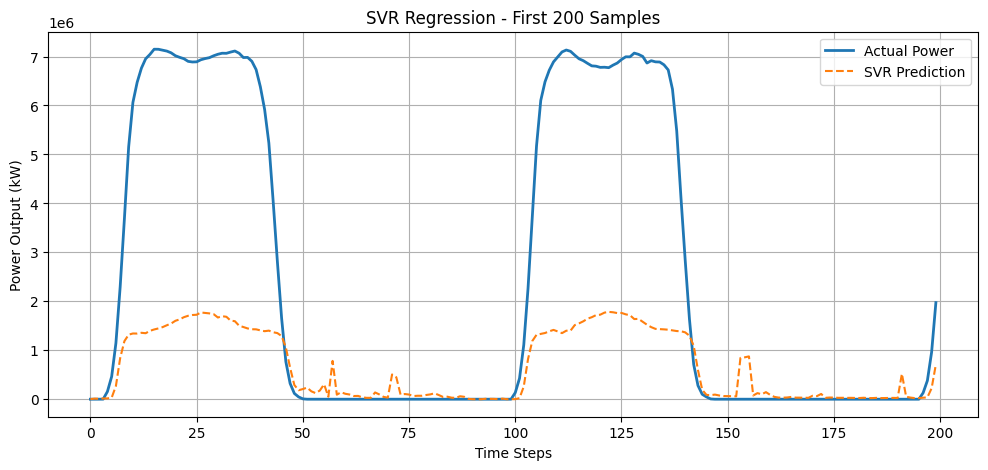


Model added to comparison table.


{'KNN': {'RMSE': np.float64(734152.6741844163),
  'MAE': 376286.35254869924,
  'R2': 0.9429466319803689},
 'SVR': {'RMSE': np.float64(3042232.659424414),
  'MAE': 1992360.9976974267,
  'R2': 0.020299418904656252}}

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np



svr_model = SVR(
    kernel='rbf',
    C=1000,
    gamma=0.0001,
    epsilon=0.1
)

svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)


rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr  = mean_absolute_error(y_test, y_pred_svr)
r2_svr   = r2_score(y_test, y_pred_svr)


print("======================================")
print("        SVR Regression Results        ")
print("======================================")
print(f"RMSE : {rmse_svr:,.3f}")
print(f"MAE  : {mae_svr:,.3f}")
print(f"R²   : {r2_svr:.4f}")
print("======================================\n")

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label='Actual Power', linewidth=2)
plt.plot(y_pred_svr[:200], label='SVR Prediction', linestyle='--')
plt.title("SVR Regression - First 200 Samples")
plt.xlabel("Time Steps")
plt.ylabel("Power Output (kW)")
plt.grid(True)
plt.legend()
plt.show()


results["SVR"] = {
    "RMSE": rmse_svr,
    "MAE": mae_svr,
    "R2": r2_svr
}

print("\nModel added to comparison table.")
results


     Random Forest Regression         
RMSE : 672,154.088
MAE  : 295,231.409
R²   : 0.9522



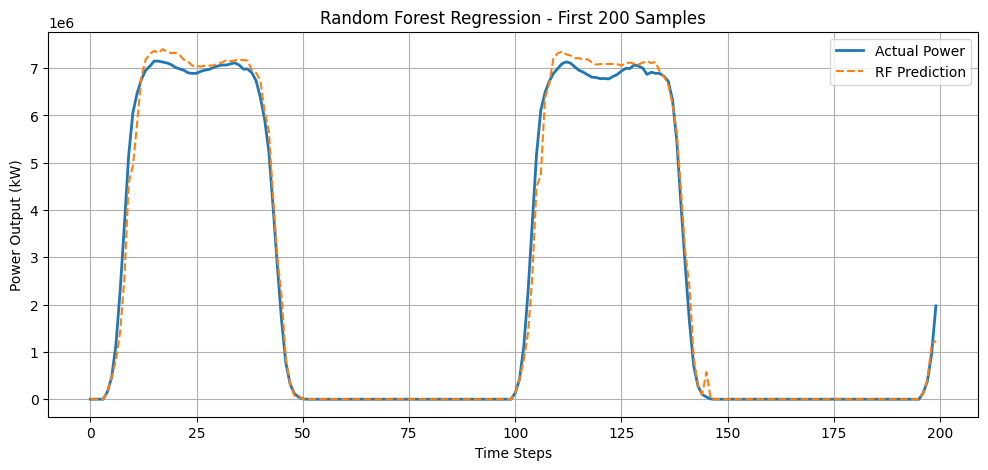


Model added to comparison table.


{'KNN': {'RMSE': np.float64(734152.6741844163),
  'MAE': 376286.35254869924,
  'R2': 0.9429466319803689},
 'SVR': {'RMSE': np.float64(3042232.659424414),
  'MAE': 1992360.9976974267,
  'R2': 0.020299418904656252},
 'Random Forest': {'RMSE': np.float64(672154.0881004673),
  'MAE': 295231.4086654376,
  'R2': 0.9521759660739523}}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
#     Random Forest Model
# -----------------------------

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
r2_rf   = r2_score(y_test, y_pred_rf)

-
print("======================================")
print("     Random Forest Regression         ")
print("======================================")
print(f"RMSE : {rmse_rf:,.3f}")
print(f"MAE  : {mae_rf:,.3f}")
print(f"R²   : {r2_rf:.4f}")
print("======================================\n")


plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label='Actual Power', linewidth=2)
plt.plot(y_pred_rf[:200], label='RF Prediction', linestyle='--')
plt.title("Random Forest Regression - First 200 Samples")
plt.xlabel("Time Steps")
plt.ylabel("Power Output (kW)")
plt.grid(True)
plt.legend()
plt.show()


results["Random Forest"] = {
    "RMSE": rmse_rf,
    "MAE": mae_rf,
    "R2": r2_rf
}

print("\nModel added to comparison table.")
results


   Gradient Boosting Regression       
RMSE : 671,386.054
MAE  : 305,011.408
R²   : 0.9523



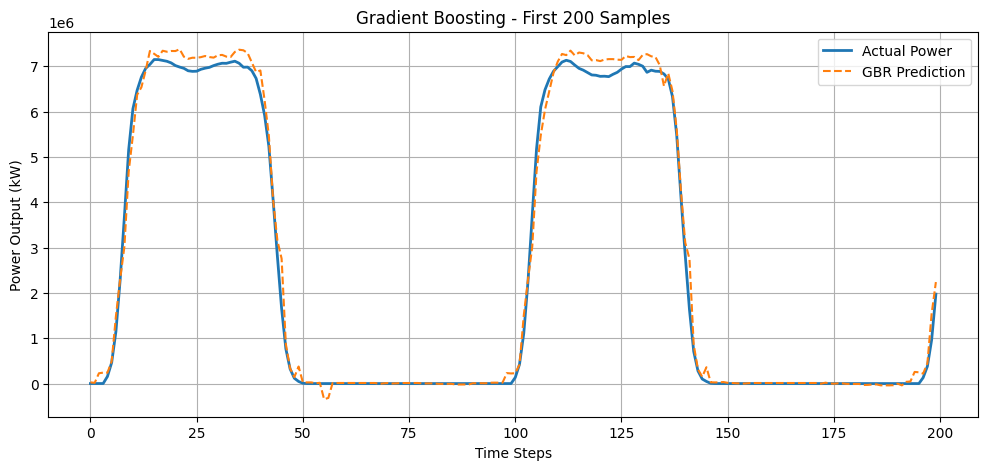


Model added to comparison table.


{'KNN': {'RMSE': np.float64(734152.6741844163),
  'MAE': 376286.35254869924,
  'R2': 0.9429466319803689},
 'SVR': {'RMSE': np.float64(3042232.659424414),
  'MAE': 1992360.9976974267,
  'R2': 0.020299418904656252},
 'Random Forest': {'RMSE': np.float64(672154.0881004673),
  'MAE': 295231.4086654376,
  'R2': 0.9521759660739523},
 'Gradient Boosting': {'RMSE': np.float64(671386.054011654),
  'MAE': 305011.40781419154,
  'R2': 0.9522851955021425}}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
#   Gradient Boosting Model
# -----------------------------

gbr_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)


gbr_model.fit(X_train, y_train)


y_pred_gbr = gbr_model.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr  = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr   = r2_score(y_test, y_pred_gbr)


print("======================================")
print("   Gradient Boosting Regression       ")
print("======================================")
print(f"RMSE : {rmse_gbr:,.3f}")
print(f"MAE  : {mae_gbr:,.3f}")
print(f"R²   : {r2_gbr:.4f}")
print("======================================\n")


plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label='Actual Power', linewidth=2)
plt.plot(y_pred_gbr[:200], label='GBR Prediction', linestyle='--')
plt.title("Gradient Boosting - First 200 Samples")
plt.xlabel("Time Steps")
plt.ylabel("Power Output (kW)")
plt.grid(True)
plt.legend()
plt.show()



results["Gradient Boosting"] = {
    "RMSE": rmse_gbr,
    "MAE": mae_gbr,
    "R2": r2_gbr
}

print("\nModel added to comparison table.")
results


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# -----------------------------
#     Random Forest Tuning
# -----------------------------

param_grid_rf = {
    "n_estimators": [200, 300, 400, 500, 800],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", 0.5]
}

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Random Search
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=20,
    cv=3,                    # 3-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#
rf_random_search.fit(X_train, y_train)

best_rf = rf_random_search.best_estimator_

print("\nBest Parameters Found:")
print(rf_random_search.best_params_)

y_pred_best_rf = best_rf.predict(X_test)

rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
mae_best_rf  = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf   = r2_score(y_test, y_pred_best_rf)

print("\n======================================")
print(" Optimized Random Forest Performance ")
print("======================================")
print(f"RMSE : {rmse_best_rf:,.3f}")
print(f"MAE  : {mae_best_rf:,.3f}")
print(f"R²   : {r2_best_rf:.4f}")
print("======================================")


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_


Best Parameters Found:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}

 Optimized Random Forest Performance 
RMSE : 618,519.224
MAE  : 297,636.058
R²   : 0.9595


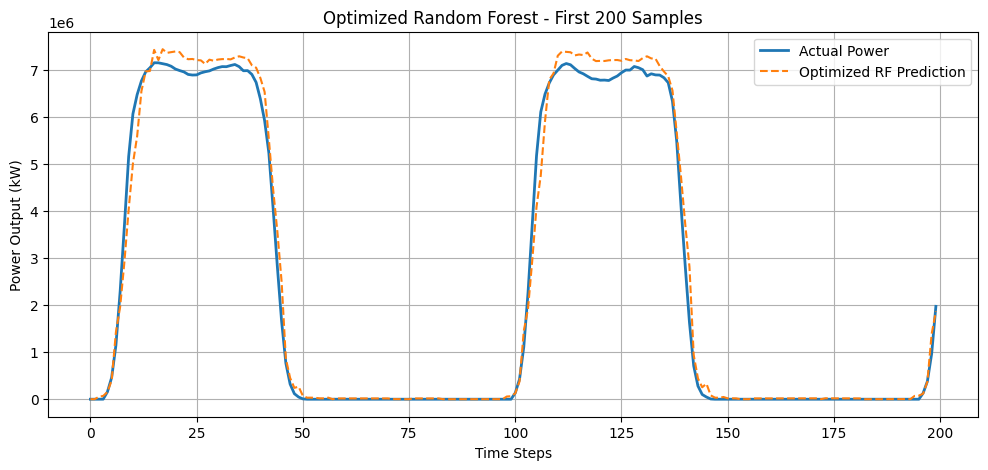

In [ ]:
# -----------------------------
#   الرسم باستخدام أفضل موديل
# -----------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label='Actual Power', linewidth=2)
plt.plot(y_pred_best_rf[:200], label='Optimized RF Prediction', linestyle='--')
plt.title("Optimized Random Forest - First 200 Samples")
plt.xlabel("Time Steps")
plt.ylabel("Power Output (kW)")
plt.grid(True)
plt.legend()
plt.show()


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters (Refined):
{'subsample': 0.85, 'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.02}

     Optimized GBR (Refined)          
RMSE : 728,986.362
MAE  : 399,518.350
R²   : 0.9437


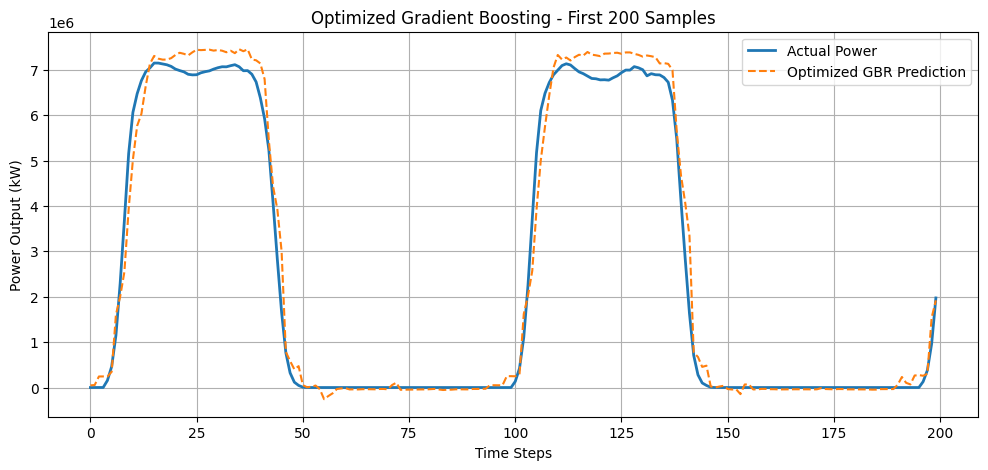

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

param_grid_gbr_refined = {
    "n_estimators": [300, 400, 500, 600],
    "learning_rate": [0.02, 0.03, 0.05, 0.07, 0.1],
    "max_depth": [2, 3],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "subsample": [0.85, 1.0],
    "max_features": ["sqrt", None]
}

gbr = GradientBoostingRegressor(random_state=42)

gbr_search_refined = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_grid_gbr_refined,
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

gbr_search_refined.fit(X_train, y_train)

best_gbr_refined = gbr_search_refined.best_estimator_

print("\nBest Parameters (Refined):")
print(gbr_search_refined.best_params_)

y_pred_best_gbr_refined = best_gbr_refined.predict(X_test)

rmse_best_gbr_refined = np.sqrt(mean_squared_error(y_test, y_pred_best_gbr_refined))  # ← تعديل مهم
mae_best_gbr_refined  = mean_absolute_error(y_test, y_pred_best_gbr_refined)
r2_best_gbr_refined   = r2_score(y_test, y_pred_best_gbr_refined)

print("\n======================================")
print("     Optimized GBR (Refined)          ")
print("======================================")
print(f"RMSE : {rmse_best_gbr_refined:,.3f}")
print(f"MAE  : {mae_best_gbr_refined:,.3f}")
print(f"R²   : {r2_best_gbr_refined:.4f}")
print("======================================")


plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label='Actual Power', linewidth=2)
plt.plot(y_pred_best_gbr_refined[:200], label='Optimized GBR Prediction', linestyle='--')
plt.title("Optimized Gradient Boosting - First 200 Samples")
plt.xlabel("Time Steps")
plt.ylabel("Power Output (kW)")
plt.grid(True)
plt.legend()
plt.show()


Fitting 3 folds for each of 30 candidates, totalling 90 fits

Best Parameters (KNN):
{'weights': 'distance', 'p': 2, 'n_neighbors': 20, 'metric': 'manhattan'}

      Optimized KNN Performance       
RMSE : 694,853.414
MAE  : 355,082.160
R²   : 0.9489


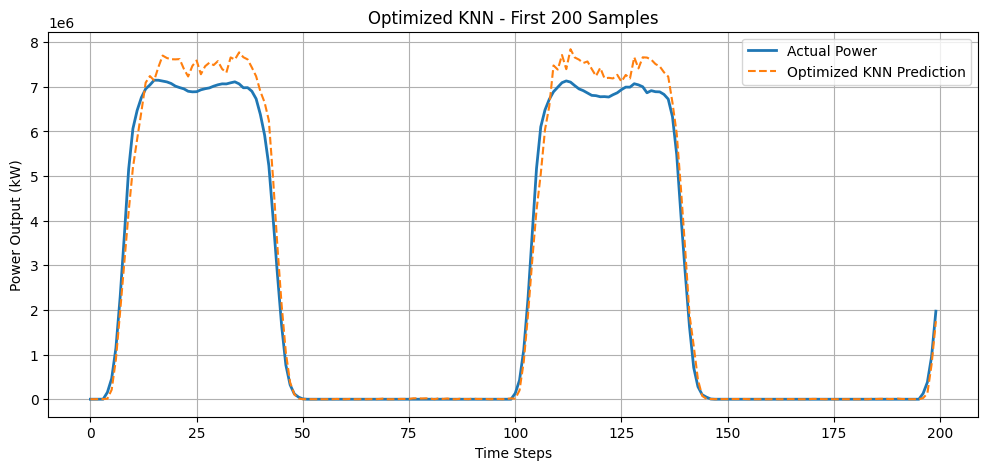

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------
#        KNN Hyperparameter Tuning
# -----------------------------------

param_grid_knn = {
    "n_neighbors": list(range(2, 40)),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2]
}

knn = KNeighborsRegressor()

knn_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_grid_knn,
    n_iter=30,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

knn_search.fit(X_train, y_train)

best_knn = knn_search.best_estimator_

print("\nBest Parameters (KNN):")
print(knn_search.best_params_)

y_pred_best_knn = best_knn.predict(X_test)

# -----------------------------
#          Evaluation
# -----------------------------
rmse_best_knn = np.sqrt(mean_squared_error(y_test, y_pred_best_knn))
mae_best_knn  = mean_absolute_error(y_test, y_pred_best_knn)
r2_best_knn   = r2_score(y_test, y_pred_best_knn)

print("\n======================================")
print("      Optimized KNN Performance       ")
print("======================================")
print(f"RMSE : {rmse_best_knn:,.3f}")
print(f"MAE  : {mae_best_knn:,.3f}")
print(f"R²   : {r2_best_knn:.4f}")
print("======================================")

# -----------------------------
#            Plotting
# -----------------------------
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label='Actual Power', linewidth=2)
plt.plot(y_pred_best_knn[:200], label='Optimized KNN Prediction', linestyle='--')
plt.title("Optimized KNN - First 200 Samples")
plt.xlabel("Time Steps")
plt.ylabel("Power Output (kW)")
plt.grid(True)
plt.legend()
plt.show()


Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best Parameters (SVR):
{'svr__kernel': 'rbf', 'svr__gamma': 'scale', 'svr__epsilon': 1, 'svr__C': 300}

      Optimized SVR Performance       
RMSE : 3,777,037.658
MAE  : 2,428,424.179
R²   : -0.5101


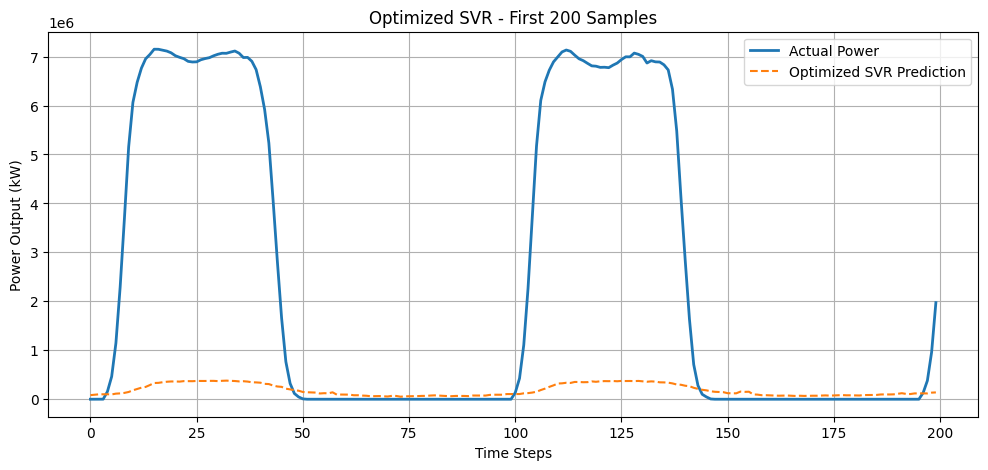

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------
#       SVR with Scaling + Tuning
# -------------------------------------

# Pipeline: Scaling → SVR
svr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

param_grid_svr = {
    "svr__kernel": ["rbf", "poly"],
    "svr__C": [1, 10, 50, 100, 300],
    "svr__gamma": ["scale", "auto", 0.001, 0.0005, 0.0001],
    "svr__epsilon": [0.1, 1, 10, 50]
}

svr_search = RandomizedSearchCV(
    estimator=svr_pipeline,
    param_distributions=param_grid_svr,
    n_iter=25,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

svr_search.fit(X_train, y_train)

best_svr = svr_search.best_estimator_

print("\nBest Parameters (SVR):")
print(svr_search.best_params_)

y_pred_best_svr = best_svr.predict(X_test)

rmse_best_svr = np.sqrt(mean_squared_error(y_test, y_pred_best_svr))
mae_best_svr  = mean_absolute_error(y_test, y_pred_best_svr)
r2_best_svr   = r2_score(y_test, y_pred_best_svr)

print("\n======================================")
print("      Optimized SVR Performance       ")
print("======================================")
print(f"RMSE : {rmse_best_svr:,.3f}")
print(f"MAE  : {mae_best_svr:,.3f}")
print(f"R²   : {r2_best_svr:.4f}")
print("======================================")

# -----------------------------
#            Plotting
# -----------------------------
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label='Actual Power', linewidth=2)
plt.plot(y_pred_best_svr[:200], label='Optimized SVR Prediction', linestyle='--')
plt.title("Optimized SVR - First 200 Samples")
plt.xlabel("Time Steps")
plt.ylabel("Power Output (kW)")
plt.grid(True)
plt.legend()
plt.show()



        XGBoost Performance          
RMSE : 763,551.849
MAE  : 314,495.354
R²   : 0.9383


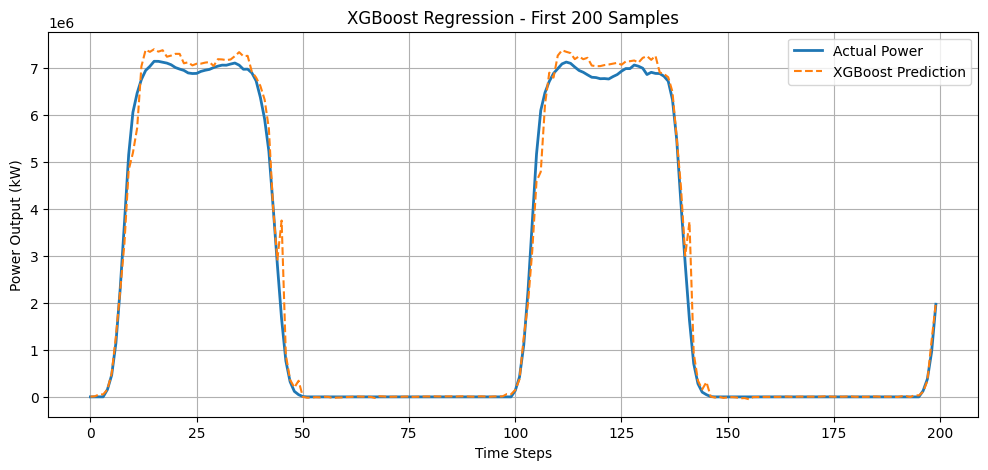


Model added to comparison table.


{'XGBoost': {'RMSE': np.float64(763551.8494286983),
  'MAE': 314495.3535020539,
  'R2': 0.9382857317623001}}

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

if "results" not in globals():
    results = {}

# -----------------------------
#        XGBoost Model
# -----------------------------

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    gamma=0,
    reg_lambda=1,
    reg_alpha=0,
    tree_method="hist",
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb  = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb   = r2_score(y_test, y_pred_xgb)

print("\n=====================================")
print("        XGBoost Performance          ")
print("=====================================")
print(f"RMSE : {rmse_xgb:,.3f}")
print(f"MAE  : {mae_xgb:,.3f}")
print(f"R²   : {r2_xgb:.4f}")
print("=====================================")


plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label='Actual Power', linewidth=2)
plt.plot(y_pred_xgb[:200], label='XGBoost Prediction', linestyle='--')
plt.title("XGBoost Regression - First 200 Samples")
plt.xlabel("Time Steps")
plt.ylabel("Power Output (kW)")
plt.grid(True)
plt.legend()
plt.show()


results["XGBoost"] = {
    "RMSE": rmse_xgb,
    "MAE": mae_xgb,
    "R2": r2_xgb
}

print("\nModel added to comparison table.")
results


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1678
[LightGBM] [Info] Number of data points in the train set: 4688, number of used features: 11
[LightGBM] [Info] Start training from score 3110401.281997
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

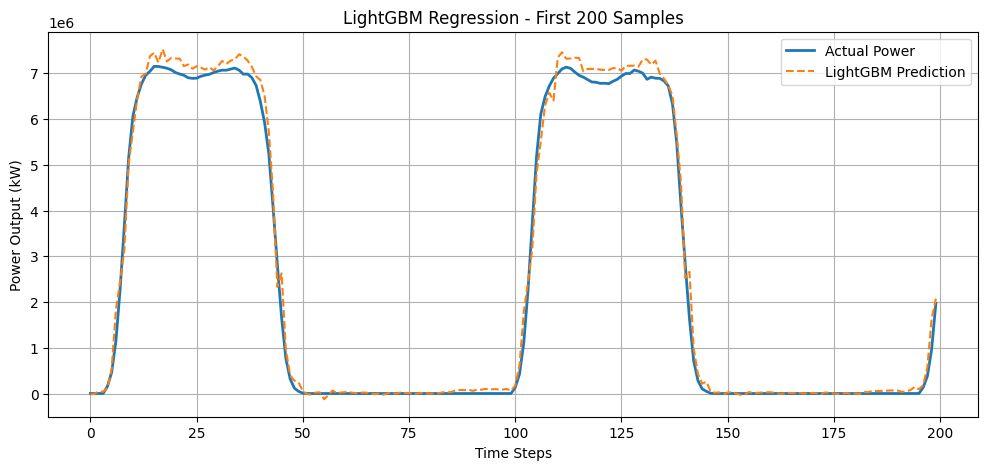


Model added to comparison table.


{'XGBoost': {'RMSE': np.float64(763551.8494286983),
  'MAE': 314495.3535020539,
  'R2': 0.9382857317623001},
 'LightGBM': {'RMSE': np.float64(639967.3808428717),
  'MAE': 292204.24197586824,
  'R2': 0.9566464970511058}}

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

if "results" not in globals():
    results = {}

# -----------------------------
#       LightGBM Model
# -----------------------------

lgb_model = lgb.LGBMRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1,
    reg_alpha=0,
    random_state=42
)

lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mae_lgb  = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb   = r2_score(y_test, y_pred_lgb)

print("\n=====================================")
print("       LightGBM Performance          ")
print("=====================================")
print(f"RMSE : {rmse_lgb:,.3f}")
print(f"MAE  : {mae_lgb:,.3f}")
print(f"R²   : {r2_lgb:.4f}")
print("=====================================")


plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label='Actual Power', linewidth=2)
plt.plot(y_pred_lgb[:200], label='LightGBM Prediction', linestyle='--')
plt.title("LightGBM Regression - First 200 Samples")
plt.xlabel("Time Steps")
plt.ylabel("Power Output (kW)")
plt.grid(True)
plt.legend()
plt.show()


results["LightGBM"] = {
    "RMSE": rmse_lgb,
    "MAE": mae_lgb,
    "R2": r2_lgb
}

print("\nModel added to comparison table.")
results


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00



         CatBoost Performance         
RMSE : 599,102.249
MAE  : 269,402.428
R²   : 0.9620


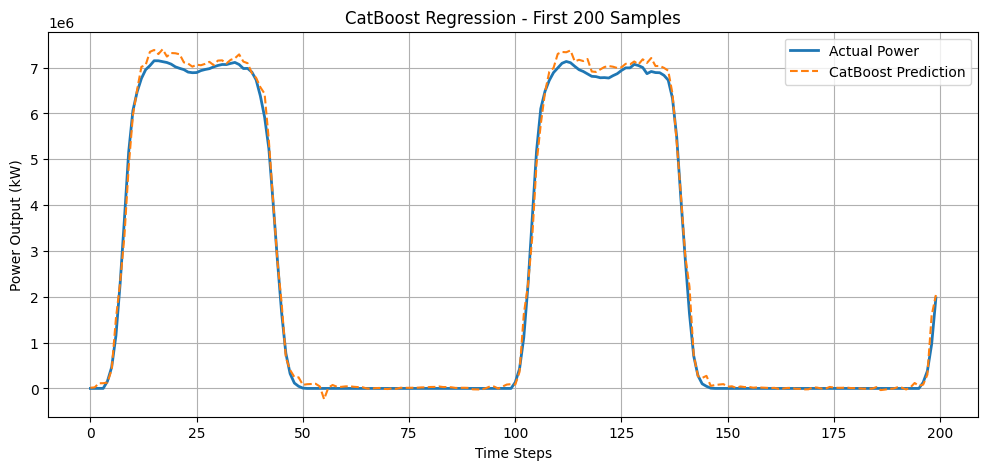


Model added to comparison table.


{'XGBoost': {'RMSE': np.float64(763551.8494286983),
  'MAE': 314495.3535020539,
  'R2': 0.9382857317623001},
 'LightGBM': {'RMSE': np.float64(639967.3808428717),
  'MAE': 292204.24197586824,
  'R2': 0.9566464970511058},
 'CatBoost': {'RMSE': np.float64(599102.2489168755),
  'MAE': 269402.428496009,
  'R2': 0.9620064025741225}}

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

if "results" not in globals():
    results = {}

# -----------------------------
#        CatBoost Model
# -----------------------------

cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function="RMSE",
    random_state=42,
    verbose=0
)

cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

# RMSE
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
mae_cat  = mean_absolute_error(y_test, y_pred_cat)
r2_cat   = r2_score(y_test, y_pred_cat)

print("\n=====================================")
print("         CatBoost Performance         ")
print("=====================================")
print(f"RMSE : {rmse_cat:,.3f}")
print(f"MAE  : {mae_cat:,.3f}")
print(f"R²   : {r2_cat:.4f}")
print("=====================================")

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label='Actual Power', linewidth=2)
plt.plot(y_pred_cat[:200], label='CatBoost Prediction', linestyle='--')
plt.title("CatBoost Regression - First 200 Samples")
plt.xlabel("Time Steps")
plt.ylabel("Power Output (kW)")
plt.grid(True)
plt.legend()
plt.show()



results["CatBoost"] = {
    "RMSE": rmse_cat,
    "MAE": mae_cat,
    "R2": r2_cat
}

print("\nModel added to comparison table.")
results


In [ ]:
import pandas as pd

df_models = pd.DataFrame(results).T
df_models



,RMSE,MAE,R2
XGBoost,763551.849429,314495.353502,0.938286
LightGBM,639967.380843,292204.241976,0.956646
CatBoost,599102.248917,269402.428496,0.962006


In [ ]:
results = {
    "Baseline_Persistence": {
        "RMSE": 390829.831,
        "MAE": 169002.015,
        "R2": 0.9838
    },
    "KNN_Original": {
        "RMSE": 734152.674,
        "MAE": 376286.353,
        "R2": 0.9429
    },
    "KNN_Optimized": {
        "RMSE": 694853.414,
        "MAE": 355082.160,
        "R2": 0.9489
    },
    "SVR_Original": {
        "RMSE": 3042232.659,
        "MAE": 1992360.998,
        "R2": 0.0203
    },
    "SVR_Optimized": {
        "RMSE": 3777037.658,
        "MAE": 2428424.179,
        "R2": -0.5101
    },
    "RandomForest_Original": {
        "RMSE": 672154.088,
        "MAE": 295231.409,
        "R2": 0.9522
    },
    "RandomForest_Optimized": {
        "RMSE": 618519.224,
        "MAE": 297636.058,
        "R2": 0.9595
    },
    "GradientBoosting_Original": {
        "RMSE": 671386.054,
        "MAE": 305011.408,
        "R2": 0.9523
    },
    "GradientBoosting_Optimized": {
        "RMSE": 728986.362,
        "MAE": 399518.350,
        "R2": 0.9437
    },
    "XGBoost": {
        "RMSE": 763551.849,
        "MAE": 314495.354,
        "R2": 0.9383
    },
    "LightGBM": {
        "RMSE": 639967.381,
        "MAE": 292204.242,
        "R2": 0.9566
    },
    "CatBoost": {
        "RMSE": 599102.249,
        "MAE": 269402.428,
        "R2": 0.9620
    }
}


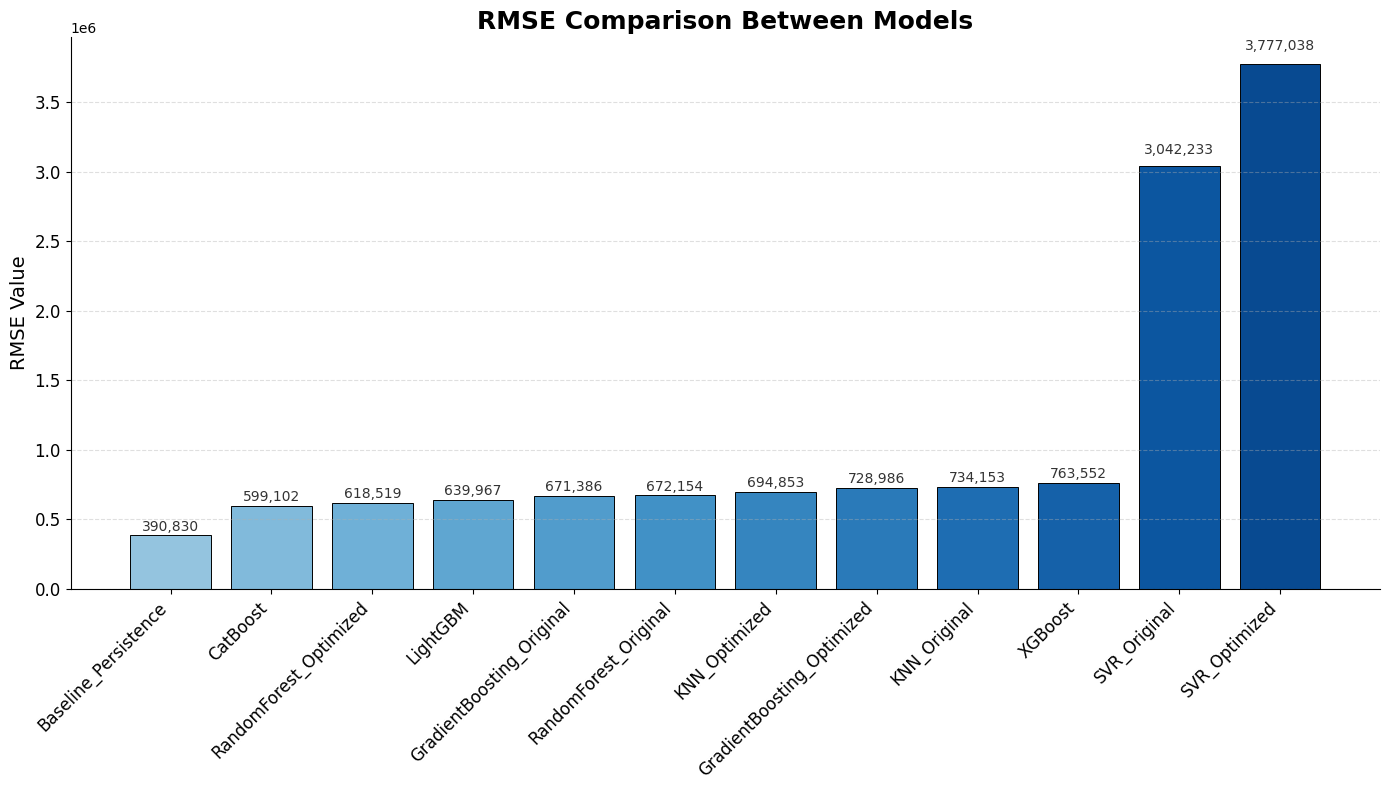

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_models = pd.DataFrame(results).T
df_sorted = df_models.sort_values("RMSE")

cmap = plt.get_cmap("Blues")
colors = cmap(np.linspace(0.4, 0.9, len(df_sorted)))

plt.figure(figsize=(14, 8))

bars = plt.bar(
    df_sorted.index,
    df_sorted["RMSE"],
    color=colors,
    edgecolor="black",
    linewidth=0.7,
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + (0.02 * height),
        f"{height:,.0f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="#333",
    )

plt.title("RMSE Comparison Between Models", fontsize=18, weight="bold")

plt.ylabel("RMSE Value", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.4)

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


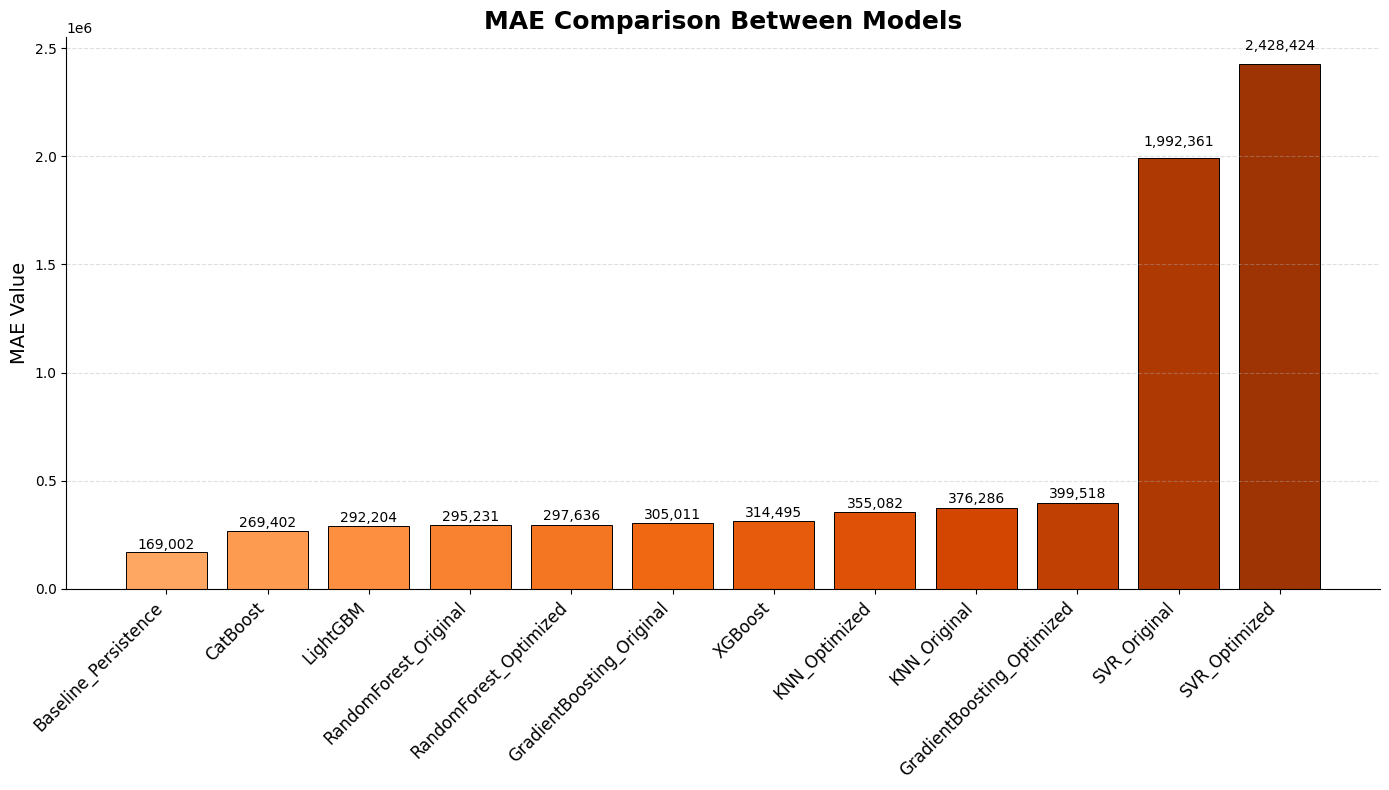

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_sorted_mae = df_models.sort_values("MAE")

cmap = plt.get_cmap("Oranges")
colors = cmap(np.linspace(0.4, 0.9, len(df_sorted_mae)))

plt.figure(figsize=(14, 8))
bars = plt.bar(df_sorted_mae.index, df_sorted_mae["MAE"],
               color=colors, edgecolor="black", linewidth=0.7)

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             h + (0.02 * h),
             f"{h:,.0f}",
             ha="center", va="bottom", fontsize=10)

plt.title("MAE Comparison Between Models", fontsize=18, weight="bold")
plt.ylabel("MAE Value", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)

for s in ["top", "right"]:
    plt.gca().spines[s].set_visible(False)

plt.tight_layout()
plt.show()


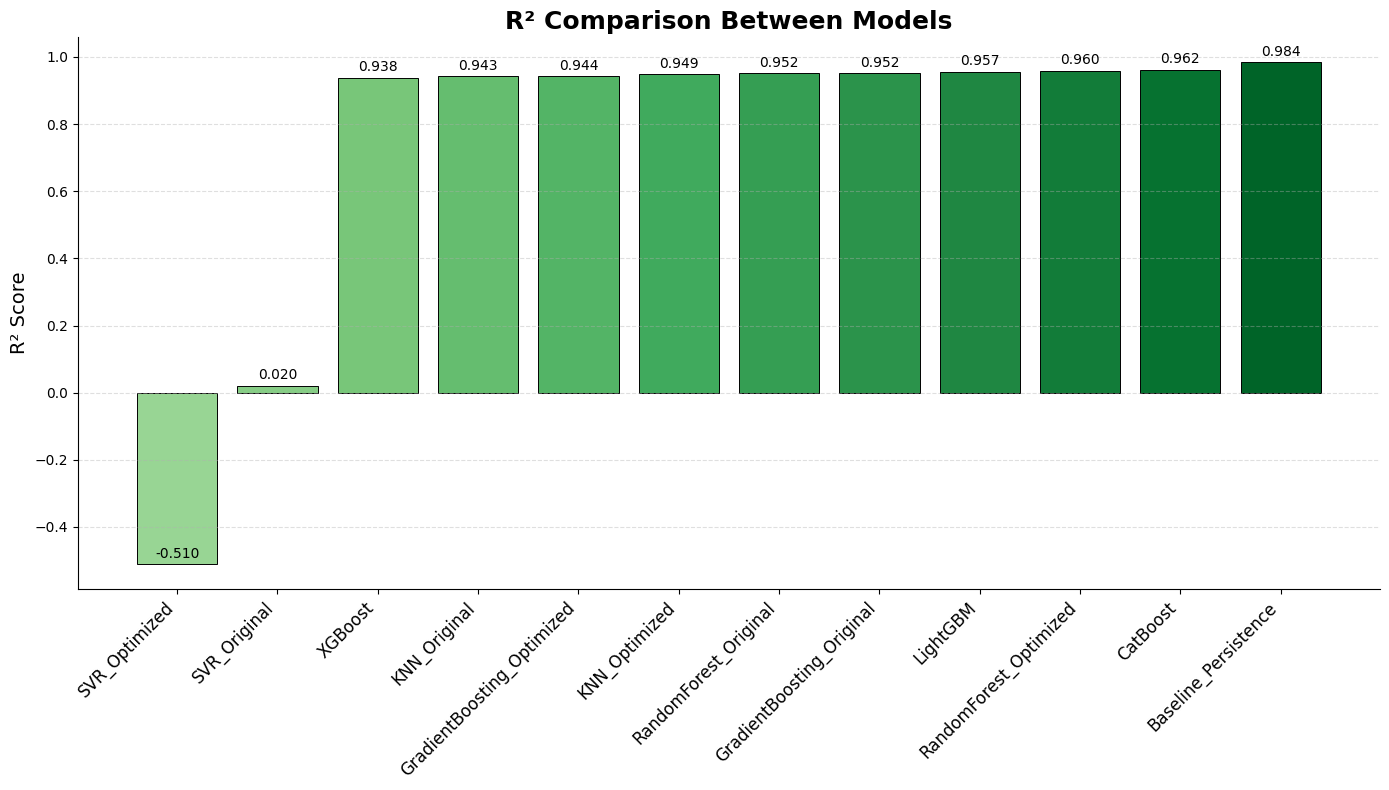

In [ ]:
df_sorted_r2 = df_models.sort_values("R2")

cmap = plt.get_cmap("Greens")
colors = cmap(np.linspace(0.4, 0.9, len(df_sorted_r2)))

plt.figure(figsize=(14, 8))
bars = plt.bar(df_sorted_r2.index, df_sorted_r2["R2"],
               color=colors, edgecolor="black", linewidth=0.7)

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             h + 0.01,
             f"{h:.3f}",
             ha="center", va="bottom", fontsize=10)

plt.title("R² Comparison Between Models", fontsize=18, weight="bold")
plt.ylabel("R² Score", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)

for s in ["top", "right"]:
    plt.gca().spines[s].set_visible(False)

plt.tight_layout()
plt.show()

